**MUQING WEN, ZHOUYI QIAN**

Spring 2023

CS 443: Bio-inspired Machine Learning

#### Week 2: Visualizing word embeddings with Self-Organizing Maps

# Project 2: Word Embeddings and Self-Organizing Maps (SOMs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import som

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Implement a Self-Organizing Map (SOM) neural network

You will implement a SOM to visualize the word embeddings in a 2D plot ("word cloud") and use the Iris dataset as a toy dataset to test your implementation.

### 3a. Load and preprocess Iris

Preprocess the data in the following way to ultimately produce `iris_x` (training data) and `iris_y` (classes):
- Use all Iris features in the dataset except for "species". Normalize each row by its Euclidean distance so that the length of each data vector is 1.
- Convert to "species" column (classes) to an int-code (e.g. values take on 0, 1, 2). *Might be helpful to consult your Project 0 from CS343.*
- Make sure `iris_x` and `iris_y` are both ndarrays.

Run the following test code to double-check your preprocessing.

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# select data cols except for species
data = iris.loc[:, iris.columns != "species"].to_numpy()
# normalize each row data vector
iris_x = data / np.sqrt(np.sum(data**2,axis=1,keepdims=True))

In [4]:
# recode species type str as ints
species =iris['species'].astype('category').cat.codes
iris_y = species.to_numpy()

#### Test Iris preprocessing

In [5]:
print(f'Number of samples are {iris_x.shape[0]} and classes are {len(iris_y)}.\nThey should both be 150.\n')
print(f'1st 2 rows of preprocessed iris:\n{iris_x[:2]}')
print('They should be:\n[[0.804 0.552 0.221 0.032]\n [0.828 0.507 0.237 0.034]]\n')
print(f'Your first 4 classes of iris:\n{iris_y[:4]} and they should be\n[0 0 0 0]')
print(f'Your last 4 classes of iris:\n{iris_y[-4:]} and they should be\n[2 2 2 2]')

Number of samples are 150 and classes are 150.
They should both be 150.

1st 2 rows of preprocessed iris:
[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]]
They should be:
[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]]

Your first 4 classes of iris:
[0 0 0 0] and they should be
[0 0 0 0]
Your last 4 classes of iris:
[2 2 2 2] and they should be
[2 2 2 2]


### 3b. Implement the SOM constructor

The main job here is to initialize the wts to normalized random values.

Write test code below by creating a SOM (call it `iris_som`) in the cell below with the following characteristics:
- 3x3 grid size
- Set the number of features equal to the number of features in the iris training set.

In [6]:
# Your code here
iris_som = som.SOM(map_sz=(3,3), num_feats=4)

# Keep this test code
test_wts = iris_som.get_wts()
print(f'Your SOM initial wt shape: {test_wts.shape}. It should be (3, 3, 4)')
print(f'Length of one of your wts: {np.sqrt(np.square(test_wts[1, 1]).sum()):.2f}. It should be very close to 1.0')
print(f'Summed length of all of your wts: {np.sqrt(np.square(test_wts).sum(axis=2)).sum()}. It should be 9.0.')

Your SOM initial wt shape: (3, 3, 4). It should be (3, 3, 4)
Length of one of your wts: 1.00. It should be very close to 1.0
Summed length of all of your wts: 9.0. It should be 9.0.


### 3c. Get the SOM best matching unit for the 1st Iris sample

Implement `get_bmu` to get the **best matching unit (BMU)** to a data sample. Recall: the BMU is the SOM neuron with the closest wts to the current data sample, measured by Euclidean distance.

**Notes**:
- In core SOM functions like this, you should not use loops of any kind. Your training code will be frustratingly slow if you use loops. Check out the method docstring to see whether loops are discouraged. *This is something that you could quantify as an extension.*
- If vectorization is taking too much time to figure out, start with for loops and revisit this later.

#### Test `get_bmu`

In the cell below, add two calls to the function to get the BMU for the FIRST and LAST Iris samples. This isn't meaningful yet because we have not trained the SOM yet.

*Keep the code that replaces the wts in your SOM — this is for testing purposes, just to ensure that everyone's test code matches despite how you generate your SOM wts.*

In [7]:
print(iris_x[0])
print(iris_x[-1])

[0.804 0.552 0.221 0.032]
[0.69  0.351 0.597 0.211]


In [8]:
np1 = np.array([[1, 2, 3], [4, 5, 6], [7, 9, 8]])
print(np.unravel_index(np.argmax(np1), (3,3)))

(2, 1)


In [9]:
# Keep this test code
np.random.seed(0)
iris_som.wts = np.random.random_sample(iris_som.wts.shape)
bmu1 = iris_som.get_bmu(iris_x[0])
bmu2 = iris_som.get_bmu(iris_x[-1])

# Add your code to get the BMU for the 1st iris sample here

print(f'BMU for Iris sample 1 is at {bmu1} and should be at (1, 0).')

# Add your code to get the BMU for the last iris sample here

print(f'BMU for Iris sample 150 is at {bmu2} and should be at (0, 2).')

BMU for Iris sample 1 is at (1, 0) and should be at (1, 0).
BMU for Iris sample 150 is at (0, 2) and should be at (0, 2).


### 3d. Find the nearest SOM wt vector to each current data sample

Implement and test `get_nearest_wts` to "automate" the process of finding the closest wts to EVERY data sample in the dataset. In this case, return the set of closest wts rather than the indices of the SOM neurons.

In [10]:
np2 = np.array([[1, 2, 3], [4, 5, 6]])
print(np2[(0, 2)])

3


In [11]:
print(f'The nearest wt vector to the 1st Iris sample {iris_x[0]} is\n{iris_som.get_nearest_wts(iris_x)[0]} and should be\n[0.568 0.926 0.071 0.087]')
print(f'The nearest wt vector to the last Iris sample {iris_x[-1]} is\n{iris_som.get_nearest_wts(iris_x)[-1]} and should be\n[0.964 0.383 0.792 0.529]')

The nearest wt vector to the 1st Iris sample [0.804 0.552 0.221 0.032] is
[0.568 0.926 0.071 0.087] and should be
[0.568 0.926 0.071 0.087]
The nearest wt vector to the last Iris sample [0.69  0.351 0.597 0.211] is
[0.964 0.383 0.792 0.529] and should be
[0.964 0.383 0.792 0.529]


### 3e. Define the Gaussian neighborhood

Once we know the BMU for a particular data sample, we want to not only update the BMU's wts, but also the wts of its neighbors in the SOM grid (albeit to a weaker extent). Before we can update the BMU's wts, we need to be able to determine the Gaussian neighborhood surrounding the BMU. This is achieved by the function `gaussian`.

Implement and test `gaussian` below.

In [12]:
row_grid, col_grid = np.meshgrid(np.arange(3), np.arange(4), indexing="ij")
print(row_grid)
print(col_grid)

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]
[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


##### Test 1

In [13]:
cent_rc = (1, 1)
sigma = 1.0
print(iris_som.gaussian(cent_rc, sigma))
print('The Test 1 Gaussian neighborhood should look like:')
print('''[[0.368 0.607 0.368]
 [0.607 1.    0.607]
 [0.368 0.607 0.368]]''')

[[0.368 0.607 0.368]
 [0.607 1.    0.607]
 [0.368 0.607 0.368]]
The Test 1 Gaussian neighborhood should look like:
[[0.368 0.607 0.368]
 [0.607 1.    0.607]
 [0.368 0.607 0.368]]


##### Test 2

In [14]:
cent_rc = (0, 1)
print(iris_som.gaussian(cent_rc, sigma))
print('The Test 2 Gaussian neighborhood should look like:')
print('''[[0.607 1.    0.607]
 [0.368 0.607 0.368]
 [0.082 0.135 0.082]]''')

[[0.607 1.    0.607]
 [0.368 0.607 0.368]
 [0.082 0.135 0.082]]
The Test 2 Gaussian neighborhood should look like:
[[0.607 1.    0.607]
 [0.368 0.607 0.368]
 [0.082 0.135 0.082]]


##### Test 3

In [15]:
cent_rc = (0, 1)
sigma = 0.5
print(iris_som.gaussian(cent_rc, sigma))
print('The Test 3 Gaussian neighborhood should look like:')
print('''[[0.135 1.    0.135]
 [0.018 0.135 0.018]
 [0.    0.    0.   ]]''')

[[0.135 1.    0.135]
 [0.018 0.135 0.018]
 [0.    0.    0.   ]]
The Test 3 Gaussian neighborhood should look like:
[[0.135 1.    0.135]
 [0.018 0.135 0.018]
 [0.    0.    0.   ]]


### 3f. Update BMU wts

Implement `update_wts` to bring the wts of the BMU and its neighbors closer to the current data sample. The SOM update rule is

$$\vec{w_{rc}}(t) = \vec{w_{rc}}(t-1) + \alpha g_{r_{bmu}, c_{bmu}}(r, c)\left ( \vec{x_i} - \vec{w_{rc}}(t-1)\right )$$

Above, $w_{rc}$ is the SOM weight vector belonging to the unit positioned at row $r$ and column $c$, $t$ is iteration number, $g_{r_{bmu}, c_{bmu}}(r, c)$ is the Gaussian neighborhood matrix centered on the BMU evaluated at the SOM $(row, col) = (r, c)$, $x_i$ is the data vector, and $\alpha$ is the learning rate.

**Note:** This weight update occurs to ALL SOM unit rows and columns $(r, c)$ because of the Gaussian neighborhood function.

#### Test `update_wts`

In the cell below, call the wt update method on the FIRST Iris sample, plugging in the row/column of the BMU determined above (*before the Gaussian tests*), and a learning rate of `0.1` and Gaussian sigma of `1.0`.

In [16]:
# Keep the following test code
np.random.seed(0)
iris_som.wts = np.random.random_sample(iris_som.wts.shape)

# Write your code here
bmu1 = iris_som.get_bmu(iris_x[0])
iris_som.update_wts(input_vector=iris_x[0], bmu_rc=bmu1, lr=0.1, sigma=1.0)

# Keep the following test code
test_wts = iris_som.get_wts()
print('Your SOM wts after updating the wts based on the 1st Iris sample are:')
print(test_wts)
print('\nThe output should be:')
print('''[[[0.564 0.705 0.58  0.514]
  [0.438 0.642 0.43  0.86 ]
  [0.962 0.385 0.787 0.525]]

 [[0.592 0.888 0.086 0.082]
  [0.068 0.816 0.744 0.819]
  [0.976 0.796 0.458 0.77 ]]

 [[0.16  0.635 0.148 0.889]
  [0.532 0.42  0.263 0.747]
  [0.459 0.568 0.02  0.613]]]''')

Your SOM wts after updating the wts based on the 1st Iris sample are:
[[[0.564 0.705 0.58  0.514]
  [0.438 0.642 0.43  0.86 ]
  [0.962 0.385 0.787 0.525]]

 [[0.592 0.888 0.086 0.082]
  [0.068 0.816 0.744 0.819]
  [0.976 0.796 0.458 0.77 ]]

 [[0.16  0.635 0.148 0.889]
  [0.532 0.42  0.263 0.747]
  [0.459 0.568 0.02  0.613]]]

The output should be:
[[[0.564 0.705 0.58  0.514]
  [0.438 0.642 0.43  0.86 ]
  [0.962 0.385 0.787 0.525]]

 [[0.592 0.888 0.086 0.082]
  [0.068 0.816 0.744 0.819]
  [0.976 0.796 0.458 0.77 ]]

 [[0.16  0.635 0.148 0.889]
  [0.532 0.42  0.263 0.747]
  [0.459 0.568 0.02  0.613]]]


### 3g. Hyperparameter decay

The last thing that needs to happen before we can train on multiple samples is to decay the network's hyperparameters (learning rate and neighborhood sigma). Implement multiplicative weight decay using the formula: $$p(t) = \beta p(t-1)$$ where $\beta$ is the decay rate.

In the cell below, write a loop that decays a parameter 10 times from its initial value of 1 with a decay rate of 0.9. You should get:

`0.9000 0.8100 0.7290 0.6561 0.5905 0.5314 0.4783 0.4305 0.3874 0.3487 `

In [17]:
val = 1
rate = 0.9
# print(f'{val:.4f}', end=' ')

for i in range(10):
    val = iris_som.decay_param(hyperparam=val, rate=rate)
    print(f'{val:.4f}', end=' ')

# Your code here

0.9000 0.8100 0.7290 0.6561 0.5905 0.5314 0.4783 0.4305 0.3874 0.3487 

### 3h. Train SOM on Iris

Implement the `fit` method to train a SOM for some number of epochs. 

Write code below that trains the SOM that you've been working with on the Iris dataset. Use the following hyperparameters:
- `10` epochs.
- learning rate of `2` and sigma of `10`.
- learning rate decay of `0.999` and sigma decay of `0.999`.

Signs that your code is working:
- it takes no longer than a second or two to run.
- you get 10 print outs (1 per epoch) showing the learning rate and sigma.
- both the learning rate and sigma decrease across epochs.
- your learning rate after 10 epochs should be `0.4459`.
- your sigma after 10 epochs should be `2.2296`.

In [25]:
# Keep the code below
np.random.seed(0)
iris_som.wts = np.random.random_sample(iris_som.wts.shape)
iris_x_cpy = iris_x.copy()

# Your code here
iris_som.fit(x = iris_x, n_epochs=10, lr=2, lr_decay=0.999, sigma=10, sigma_decay=0.999, print_every=1, verbose=True)

# Keep the below code for testing
if not np.allclose(iris_x, iris_x_cpy):
    print('Uh oh, you changed the original training data, which is not good.')

Starting to train network ....
Epoch 0/10, Learning rate: 1.7213%, Sigma: 8.6064%, Error: 0.2525.
Epoch 1/10, Learning rate: 1.4814%, Sigma: 7.4071%, Error: 0.1847.
Epoch 2/10, Learning rate: 1.2750%, Sigma: 6.3748%, Error: 0.1789.
Epoch 3/10, Learning rate: 1.0973%, Sigma: 5.4865%, Error: 0.2085.
Epoch 4/10, Learning rate: 0.9444%, Sigma: 4.7219%, Error: 0.1807.
Epoch 5/10, Learning rate: 0.8128%, Sigma: 4.0639%, Error: 0.1996.
Epoch 6/10, Learning rate: 0.6995%, Sigma: 3.4975%, Error: 0.1784.
Epoch 7/10, Learning rate: 0.6020%, Sigma: 3.0101%, Error: 0.2114.
Epoch 8/10, Learning rate: 0.5181%, Sigma: 2.5907%, Error: 0.1452.
Epoch 9/10, Learning rate: 0.4459%, Sigma: 2.2296%, Error: 0.1291.


### 3i. Assessing performance with quantization error

How well did you do at learning the structure of Iris?

One way to answer this question is to compute the **BMU quantization error** (BMU error for short): On average, how much error do we incur by approximating each data sample by the weights of the corresponding BMU in the network? 

#### Todo

- Implement the `error` method to determine the BMU error.
- Go back to `fit` and when you print out training progress, print out the BMU error evaluated on the entire training set. If everything goes well, in the above fit test run with Iris, your BMU error steadily decrease over the 10 epochs (*There may be the occasional increase, but it should decrease on average over the 10 epochs*).

### 3j. Visualize the learned structure of Iris by SOM

One main advantage of using SOM is the ability to visualize the structure of high dimensional data in 2D. A trained SOM can be visualized by computing its **U-matrix**: the average distance between each neuron's weights and its 8 neighbors.

Implement `u_matrix` so that you can visualize your network's representation of the Iris data.

#### Test `u_matrix`

In the cell below, do the following to visualize the learned representation of Iris across the SOM grid of neurons.
- Train a 70x70 SOM on Iris for 4 epochs. Use an initial learning rate of 1 and sigma of 45. Set both decay factors to 0.99. This should complete in at most several seconds.
- Compute the U-matrix and plot it as a grayscale image/heatmap. Add a colorbar.
- Superimpose plot markers corresponding to each Iris sample (i.e. there should be 150 of them). Do this by determining the BMU of each data sample in the trained SOM, then drawing a plot marker at the BMU position. Color each marker according to the sample's true class. 

If all goes well, your U-matrix superimposed with the most active units for each training sample should (qualitatively) look like the lower-right image on [Wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map#/media/File:SOM_of_Fishers_Iris_flower_data_set.JPG).

In [43]:
# Keep this seed
np.random.seed(2)

som_sz = (70, 70)
n_features = 4
n_epochs = 4

# Your code here

# Train a 70 x 70 SOM on Iris for 4 epochs
# Use an initial learning rate of 1 and sigma of 45.
# Set both decay factors to 0.99.
iris_som2 = som.SOM(map_sz=som_sz, num_feats=n_features)
iris_som2.fit(x = iris_x, n_epochs=n_epochs, lr=1, lr_decay=0.99, sigma=45, sigma_decay=0.99, print_every=1, verbose=True)

Starting to train network ....
Epoch 0/4, Learning rate: 0.2215%, Sigma: 9.9653%, Error: 0.0209.
Epoch 1/4, Learning rate: 0.0490%, Sigma: 2.2068%, Error: 0.0164.
Epoch 2/4, Learning rate: 0.0109%, Sigma: 0.4887%, Error: 0.0158.
Epoch 3/4, Learning rate: 0.0024%, Sigma: 0.1082%, Error: 0.0157.


In [42]:
arr_3 = np.zeros(shape=(5, 6))
arr_3[0:3, 2:4] = 1
print(arr_3)
arr_3[3, 4] = 5
print(arr_3)

[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [52]:
u_matrix, dict_neigh = iris_som2.u_matrix()
print(u_matrix.shape)
print(dict_neigh)

(70, 70)
{4: 4, 6: 272, 9: 4624}


In [51]:
(70 - 2)*4

272

In [62]:
x = []
y = []
for i in range(iris_x.shape[0]):
    r, c = iris_som2.get_bmu(iris_x[i])
    x.append(r)
    y.append(c)
    
print(len(x), len(y), len(iris_y))

150 150 150


In [66]:
print(np.unique(iris_y))

[0 1 2]


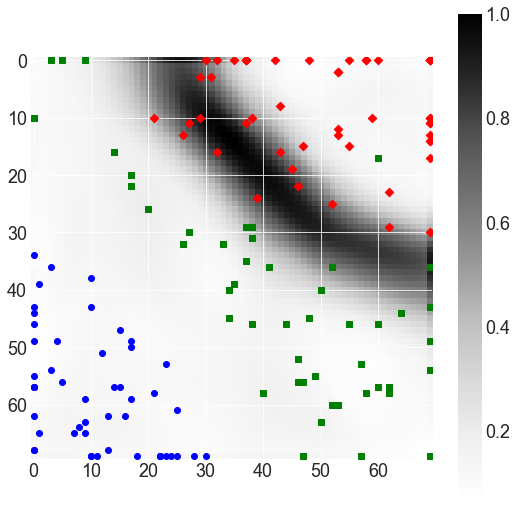

In [72]:
markers = ['o','s','D']
colors = ['b','g','r']

# Your code here

import palettable

def plot_umatrix(u_matrix, x, y, iris_y, markers, colors):
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
    cb = axes.imshow(u_matrix, cmap=palettable.colorbrewer.sequential.Greys_9.mpl_colormap)
    # axes.scatter(x=x, y=y, c=iris_y)
    for i in range(len(iris_y)):
        c = iris_y[i]
        axes.scatter(x=x[i], y=y[i], c=colors[c], marker=markers[c])
    
    plt.colorbar(cb)

plot_umatrix(u_matrix, x, y, iris_y, markers, colors)

### 3k. Questions

**Question 3**: Explain what the above visualization is showing us. Why does the plot look different than Iris scatter plots like you're used to seeing? 

**Question 4**: Copy the plot with default hyperparameters into a separate cell (or save it in your project folder). How do the following affect the structure of the U-matrix?
- Number of epochs
- learning rate
- Gaussian neighborhood sigma
- SOM grid size

**Question 5**: Change the random seed. Does it matter that the clusters may jump around? **Explain why**.

**Question 6**: What does the dark band mean? What does it tell us about the data?

**Answer 3**: 

**Answer 4**:

**Answer 5**: 

**Answer 6**:

## Task 4: Visualize IMDb word embeddings as a word cloud

### 4a. Load word embedding vectors

- Run the cell below to load the Skip-gram word embeddings and the associated word strings.
- Standardize your word vectors, treating them as your "dataset" (i.e. standardize across samples).

In [ ]:
word_vectors = np.load('results/imdb_word_vectors.npy')
word_strings = np.load('results/imdb_word_strings.npy')
print(f'Loaded {len(word_vectors)} word embedding vectors and {len(word_strings)} words.')

### 4b. Train SOM on word embedding vectors

Below, train a new SOM on the word vectors. Training should take around 1 minute or less with the following suggested hyperparameters to get you started:
- 100x100 size
- 50 epochs
- Initial learning rate of 3 with a decay rate of 0.9999.
- Initial Gaussian neighborhood standard deviation of 100 with a decay rate of 0.9999.

After training, create a grayscale heatmap of the U-matrix with a colorbar like you did for Iris (don't superimpose the data samples). You want to check and make sure that the U-matrix has structure to it (not look like salt-and-pepper pixel noise or be completely black/white/gray).

**Notes:**
- You are encouraged to experiment with the hyperparameters, the above values are starting points. *A more detailed investigation could be an extension.*
- Training can be much, much slower if you have used for loops in the core algorithm (methods called on every iteration of SGD). If you're unable to do this, reduce the SOM grid size and/or number of training epochs, but be aware that your results may not be as good.

In [76]:
# Keep this random seed
np.random.seed(0)

# Your code here

### 4c. Produce IMDb review word cloud

Run the following code to generate the word cloud. This is similar to what you did for Iris, except rather than showing colored plot markers, we are displaying the word at the position of its BMU in the SOM grid.

Feel free to adjust the number of words visualized, font size, and the random offset of each BMU to help reduce words being plotted on top of each other.

In [ ]:
# np.random.seed(0)
num_words_to_visualize = 600
word_inds = np.random.choice(len(word_vectors), size=num_words_to_visualize, replace=False)

jitter = 1
jitter_xy = np.random.uniform(low=-jitter, high=jitter, size=(num_words_to_visualize, 2))

fig, ax = plt.subplots(figsize=(40, 40))
for i, ind in enumerate(word_inds):
    bmu_pos = word_som.get_bmu(word_vectors[ind])
    # jitter the placement of words so that they are less likely to plot ontop of each other
    x = bmu_pos[0] + 0.5 + jitter_xy[i, 0]
    y = bmu_pos[1] + 0.5 + jitter_xy[i, 1]
    ax.scatter(x, y)
    ax.annotate(str(word_strings[ind]), (x, y), fontsize=30)
plt.show()

### 4d. Questions

**Question 7:** What are your favorite word clusters?

**Question 8:**

(a) Are there any word groupings that surprised you (but make sense post-hoc)?

(b) Are there words that you think should go together but are not?

**Answer 7:**

**Answer 8:**

## Extensions

### 1. SOM quantization error

Do an analysis (make plots, explain findings) where you investigate how various Skim-gram and/or SOM parameters affect the quantization error. Parameters you might experiment with are:
- Number of epochs (Skip-gram and/or SOM)
- SOM size
- Learning rate (and its decay rate)
- Gaussian sigma (and its decay rate)
- Number of reviews used to train Skip-gram
- Context word window size.

**NOTE:** Some parameters may need to adjusted together in some fashion. For example, decreasing the SOM size decreases the grid size. Therefore, the Gaussian neighborhood size $\sigma$ probably needs to be rescaled, as does the learning rate (how much vectors move around in the space duing each update).

### 2. More sophisticated text preprocessing

To preprocess text for Skipgram, we defined words as strings with at least one letter. Research and examine whether more sophisticated approaches (e.g. removing stop words, destemming, lemmatization, etc) to preprocessing text yield better word embedding results (better quality word context predictions, better word similiarity as represented by the SOM).

### 3. Skip-gram word context

We only used the Skip-gram network to extract the word embedding vectors. Load in the IMDb test set and explore how a trained Skip-gram network can predict words surrounding each target word.

### 4. Continuous Bag of Words (CBOW)

In addition to Skip-gram, Mikolov et al. also proposed the CBOW model. Duplicate your Skipgram code and make the necessary modifications to implement CBOW. CBOW has the same overall architecture to Skip-gram, but the target and context words exchange roles in CBOW. In CBOW:
- Context words (multi-hot coded) serve as the data samples.
- Target words (one-hot coded) serve as the classes.

Thus, the CBOW network is trained to "fill in the blank" given the context words.

- How do the word vectors compare to Skipgram?
- Analyze the target word predictions.

### 5. Quality of SOM word clusters

Experiment with how SOM learning parameters and Skip-gram training time (and other parameters like # embedding dimensions) affect the quality of similar word cluster.

### 6. Other text datasets

Obtain, load, and preprocess other text datasets. Train Skip-gram, visualize the word vectors using SOM, and interpret what you find.

### 7. Supervised learning with Learning Vector Quantization (LVQ)

The SOM algorithm is closely related to LVQ, which can be applied to supervised learning problems. Create a child class of SOM that implements the LVQ algorithm and analyze its behavior when applied to a supervised learning dataset. There are numerous variants of LVQ (e.g. LVQ2, LVQ2.1, LVQ3, etc.). **Note:** Initialize the weights by randomly selecting samples in the dataset.

### 8. Dimensionality reduction via SOM vs PCA

Do a comparison between the dimensionality reduction offered by SOM vs PCA.

### 9. Dimensionality reduction and visualization of non-text datasets

SOM can be used to visualize and analyze the structure of high dimensional, non-text datasets. Find such datasets and apply SOM on them then analyze/interpret the structure.

### 10. Implement mini-batch support or the batch SOM weight update rule

Follow the strategy outlined in the notes for adding mini-batch or full batch support. Both approaches should improve the speed of training so it would be interesting to compare the runtime and other performance characteristics between the "SGD-style" and mini-batch and/or batch approaches.

### 11. Initialize SOM weights with first two principal component vectors

Follow the strategy outlined in class and the notes for PCA-based weight initialization. Compare the number of epochs necessary to train SOM effectively and analyze error and other characteristics.